# Align paralogous contigs to reference

If you applied the `--keep-paralogs` flag in the SECAPR `find_target_contigs` function, the function will print a text file with paralogous information into the subfolder of each sample. This file contains the information about the locus id (first column) in the reference file, followed by a list of contig headers that were matched to this locus:

In [8]:
%%bash
head -n 10 ../../data/processed/target_contigs_paralogs/1061/info_paralogous_loci.txt

214	86725	263626																												
213	107618	194246																												
669	53180	125308																												
762	122510	147847	263530																											
763	153094	19254	19255	114710	177616	211218	256601																							
761	5580	46418	249536																											
663	114228	114230																												
662	33701	162610																												
764	18002	46660	184621																											
765	48851	171788	217113	218255	254469																									


We can use the SECAPR `paralogs_to_ref` function to extract the sequences of all these contigs and align them with their respective reference sequence. This will give an idea of where the contigs map on the reference and can help decide if these are truly potential paralogous or more likely the result of non-optimal contig assembly (clusters of homologous reads are broken into separate contigs) or if contigs from other parts of the genome map to the reference due to the presence of e.g. repetitive regions or other common sequence patterns.

We need to provide the function the following input items:
- path to the de novo contig files
- path to the reference fasta file, which was used to extract target contigs
- path to the extracted target contigs (output of `find_target_contigs` function)

The command looks as follows:

`secapr paralogs_to_ref --contigs ../../data/processed/contigs --reference ../../data/raw/palm_reference_sequences.fasta --target_contigs ../../data/processed/target_contigs_paralogs_info --output ../../data/processed/paralogs_to_reference`

Depending on how many paralogous loci were identified in your samples this can take several minutes. The script will store the final alignments of the contigs and the reference sequences for each sample in the `paralog_alignments` folder in the provided output path. Let's look at one exemplarly alignment. You can view alignments using alignment viewers such as e.g. [AliView](http://ormbunkar.se/aliview/):

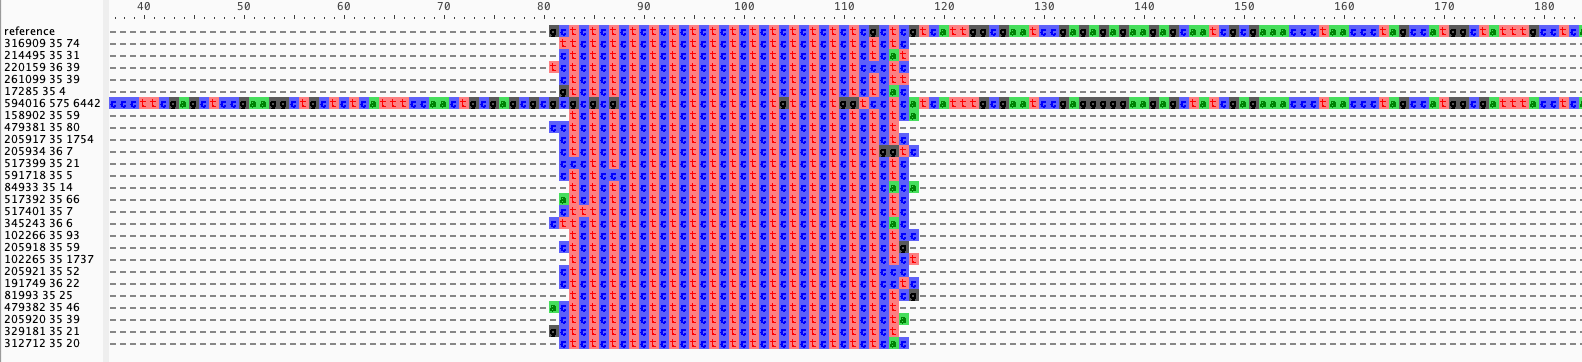

In [10]:
from IPython.display import Image, display
img1 = Image("../../images/paralog_contig_alignment.png",width=1000)
display(img1)

In this example you see the reference sequence in the first line starts with a repetative sequence (CTCTCTCTC....). Many contigs that only consist of this repetitive sequence appear to map to it. Only one of the contigs, however, apears to be a true match, as it exceeds the repetative region and has a lot of overlap with the reference sequence. A locus like this doesn't need to be excluded, since we see that even though it's flagged as paralogous, there are no true signs of paralogy.

[Back](extract_contigs.ipynb)